   <h2>PREDICT THE PRICE OF AIRBNB LISTINGS<h2>

Airbnb is an Online home-sharing marketplace for arranging or offering
lodging, primarily homestays, or tourism experiences. Since its inception in 2008,
Airbnb has seen an enormous growth, with the number of rentals listed on its
website growing exponentially each year.
    
Rental Hostings has become very interesting for most households in cities
like Singapore which is very small but heavily urbanised. Therefore, being able to
accurately value the prices will not only facilitate market transactions by providing
valuable guidance for all market participants (be it home owners, visitors, airbnb or
its competitors), but also provide useful insights for policy makers and government
authorities in understanding the current state of this online marketplace.

Task:

In this Model, we expected to create an analytical and modelling
framework to predict the prices based on the quantitative and qualitative features
provided in the dataset while answering other questions too cited below.

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVC, SVR
from mlxtend.plotting import plot_learning_curves
from scipy.stats import kurtosis
from scipy.stats import skew
import warnings
warnings.simplefilter('ignore')

In [204]:
print('Reading File from Workspace\n')

Reading File from Workspace



In [205]:
df=pd.read_csv('listings.csv')

In [206]:
df.shape

(7675, 67)

In [207]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,experiences_offered,thumbnail_url,medium_url,picture_url,xl_picture_url,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20190900000000,43733,COZICOMFORT LONG TERM STAY ROOM 2,none,NaN,NaN,https://a0.muscache.com/im/pictures/24485541/6...,NaN,...,f,NaN,NaN,f,f,flexible,t,t,2,0.01
1,50646,https://www.airbnb.com/rooms/50646,20190900000000,43733,Pleasant Room along Bukit Timah,none,NaN,NaN,https://a0.muscache.com/im/pictures/36342984/6...,NaN,...,f,NaN,NaN,f,f,moderate,f,t,1,0.27
2,56334,https://www.airbnb.com/rooms/56334,20190900000000,43733,COZICOMFORT,none,NaN,NaN,https://a0.muscache.com/im/pictures/20783922/1...,NaN,...,f,NaN,NaN,f,f,flexible,t,t,2,0.20
3,71609,https://www.airbnb.com/rooms/71609,20190900000000,43733,Ensuite Room (Room 1 & 2) near EXPO,none,NaN,NaN,https://a0.muscache.com/im/pictures/24453191/3...,NaN,...,f,NaN,NaN,t,f,moderate,f,t,9,0.16
4,71896,https://www.airbnb.com/rooms/71896,20190900000000,43733,B&B Room 1 near Airport & EXPO,none,NaN,NaN,https://a0.muscache.com/im/pictures/2440674/ac...,NaN,...,f,NaN,NaN,t,f,moderate,f,t,9,0.22


In [208]:
df=df[df['price']>0]
df.reset_index(drop=True,inplace=True)
print('after droping price which were lessthan Zero : ',df.shape)

after droping price which were lessthan Zero :  (7674, 67)


<h4> Data Processing

In [209]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7674.0,2.356831e+07,1.035762e+07,4.909100e+04,1.583136e+07,2.469275e+07,3.267125e+07,3.889002e+07
scrape_id,7674.0,2.019090e+13,0.000000e+00,2.019090e+13,2.019090e+13,2.019090e+13,2.019090e+13,2.019090e+13
last_scraped,7674.0,4.373300e+04,0.000000e+00,4.373300e+04,4.373300e+04,4.373300e+04,4.373300e+04,4.373300e+04
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,7674.0,9.097149e+07,8.220789e+07,2.366600e+04,2.313690e+07,6.335805e+07,1.513169e+08,2.975498e+08
host_response_rate,6271.0,9.180067e-01,1.852283e-01,0.000000e+00,9.400000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,7674.0,1.314365e+00,3.019334e-02,1.242790e+00,1.296623e+00,1.311180e+00,1.322180e+00,1.454590e+00


In [210]:
del_cols=[]
for i in df.columns:
    if df[i].nunique()<2:
        del_cols.append(i)
    elif 'url' in i:
        del_cols.append(i)
        
df.drop(del_cols,axis=1,inplace=True)    

In [211]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7674,NaN,NaN,NaN,2.35683e+07,1.03576e+07,49091,1.58314e+07,2.46927e+07,3.26713e+07,3.889e+07
name,7672,7244,Luxury hostel with in-cabin locker - Single mixed,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,7674,NaN,NaN,NaN,9.09715e+07,8.22079e+07,23666,2.31369e+07,6.33581e+07,1.51317e+08,2.9755e+08
host_name,7673,1805,Jay,291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_since,7670,1626,2016-04-09,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_location,7655,226,Singapore,3723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_time,6271,4,within an hour,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,6271,NaN,NaN,NaN,0.918007,0.185228,0,0.94,1,1,1
host_is_superhost,7673,2,f,6280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_verifications,7674,195,"['email', 'phone', 'reviews', 'jumio', 'govern...",1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_group', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating', 'license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

<h3> Droping Some More Extra Cols based on importance

In [213]:
df['host_has_profile_pic'].value_counts()

t    7659
f      14
Name: host_has_profile_pic, dtype: int64

In [214]:
extra_cols=['id', 'name', 'host_id', 'host_name', 'host_since',
            'host_verifications','host_location','host_has_profile_pic','street','city', 
            'state','zipcode', 'market', 'smart_location', 'latitude', 'longitude', 'neighbourhood',
            'is_location_exact','square_feet','minimum_nights','maximum_nights','number_of_reviews_ltm','license',
           'require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count','host_response_time',
           'host_response_rate','review_scores_rating','reviews_per_month']

In [215]:
df=df.drop(extra_cols, axis=1)

In [216]:
df.shape

(7674, 19)

<h3> Checking for missing Values

In [217]:
df.isnull().sum()

host_is_superhost            1
host_identity_verified       1
neighbourhood_group          0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    5
bedrooms                     2
beds                        14
bed_type                     0
amenities                    0
price                        0
security_deposit          2292
cleaning_fee              2055
guests_included              0
extra_people                 0
number_of_reviews            0
instant_bookable             0
cancellation_policy          0
dtype: int64

In [218]:
df['host_is_superhost'].value_counts()

f    6280
t    1393
Name: host_is_superhost, dtype: int64

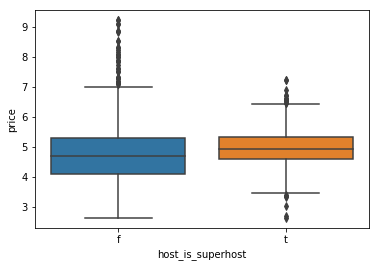

In [219]:
sns.boxplot(x=df['host_is_superhost'],y=np.log(df['price']))

In [220]:
num_cols=['security_deposit','cleaning_fee']
median_cols=['bathrooms','beds','bedrooms']
str_cols=['host_is_superhost','host_identity_verified']

In [221]:
mean_imp=SimpleImputer(missing_values=np.nan,fill_value=0)
median_imp=SimpleImputer(missing_values=np.nan,strategy='median')
mode_imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df[num_cols]=mean_imp.fit_transform(df[num_cols])
df[median_cols]=median_imp.fit_transform(df[median_cols])
df[str_cols]=mode_imp.fit_transform(df[str_cols])

In [222]:
df.isnull().sum()

host_is_superhost         0
host_identity_verified    0
neighbourhood_group       0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
amenities                 0
price                     0
security_deposit          0
cleaning_fee              0
guests_included           0
extra_people              0
number_of_reviews         0
instant_bookable          0
cancellation_policy       0
dtype: int64

In [223]:
df.shape

(7674, 19)

In [224]:
df['property_type'].value_counts()

Apartment             3335
Condominium           1934
Serviced apartment     898
House                  475
Hostel                 279
Townhouse              126
Boutique hotel         118
Loft                   109
Hotel                  103
Bed and breakfast       68
Bungalow                61
Other                   58
Guesthouse              26
Guest suite             25
Tent                    18
Villa                   14
Aparthotel              12
Campsite                 4
Boat                     4
Chalet                   3
Cabin                    1
Farm stay                1
Castle                   1
Bus                      1
Name: property_type, dtype: int64

In [225]:
b=list(df['property_type'].unique())
property_type=[]
for i in b:
    if i in ['Apartment','Condominium','Serviced apartment','House','Hostel']:
        pass
    else:
        property_type.append(i)
df['property_type']=df['property_type'].replace(to_replace=property_type,value='others')

In [226]:
df['property_type'].value_counts()

Apartment             3335
Condominium           1934
Serviced apartment     898
others                 753
House                  475
Hostel                 279
Name: property_type, dtype: int64

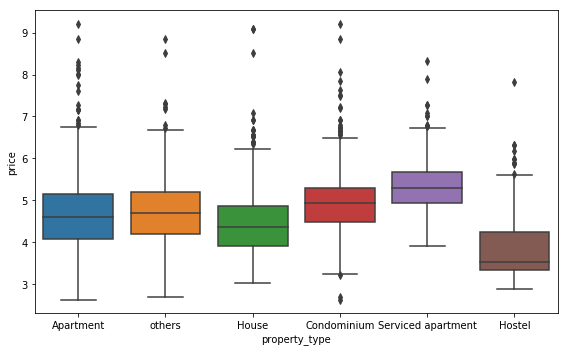

In [227]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['property_type'],y=np.log(df['price']))
plt.tight_layout()

<h3> Data Visualization

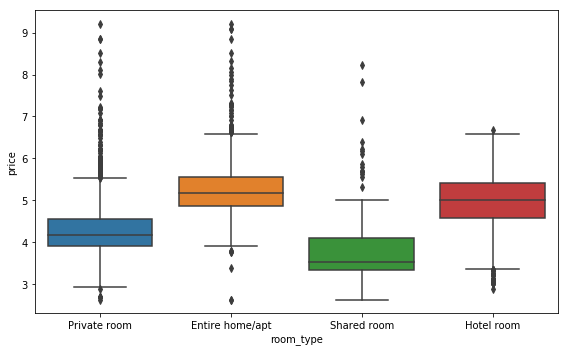

In [228]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['room_type'],y=np.log(df['price']))
plt.tight_layout()

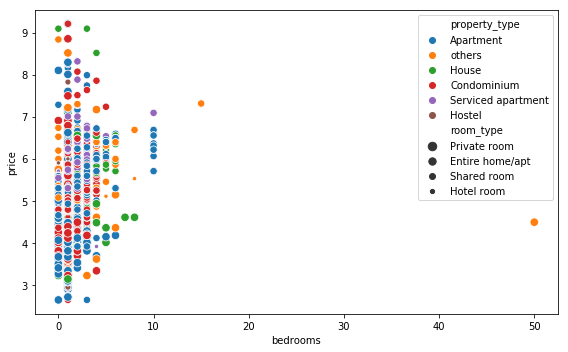

In [162]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['bedrooms'],y=np.log(df['price']),hue=df['property_type'],size=df['room_type'])
plt.tight_layout()

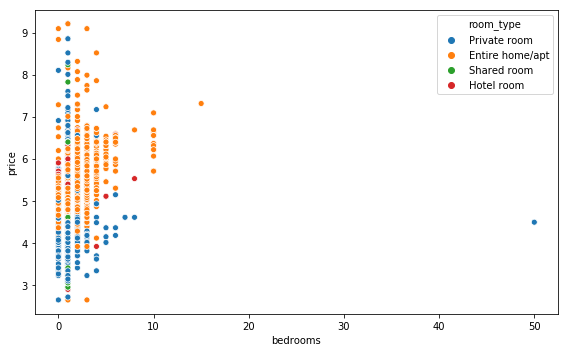

In [163]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['bedrooms'],y=np.log(df['price']),hue=df['room_type'])
plt.tight_layout()

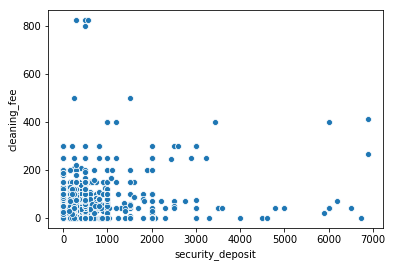

In [164]:
sns.scatterplot(x=df['security_deposit'],y=df['cleaning_fee'])

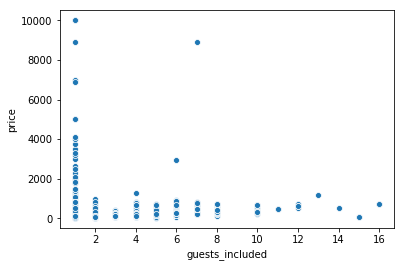

In [165]:
sns.scatterplot(x=df['guests_included'],y=df['price'])

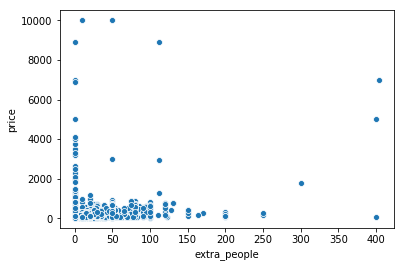

In [166]:
sns.scatterplot(x=df['extra_people'],y=df['price'])

<h3> Checking for Outliers

In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,7674.0,3.410086,2.642830,1.0,2.0,2.000000,4.000000,16.0
bathrooms,7674.0,1.564113,1.329176,0.0,1.0,1.000000,2.000000,50.0
bedrooms,7674.0,1.347146,1.133544,0.0,1.0,1.000000,2.000000,50.0
beds,7674.0,1.994136,2.225193,0.0,1.0,1.000000,2.000000,36.0
price,7674.0,167.413213,320.833943,14.0,65.0,120.000000,200.000000,10000.0
security_deposit,7674.0,250.513006,371.448328,0.0,138.0,250.513006,250.513006,6883.0
cleaning_fee,7674.0,40.524471,38.002153,0.0,25.0,40.524471,50.000000,822.0
guests_included,7674.0,1.989184,1.615209,1.0,1.0,1.000000,2.000000,16.0
extra_people,7674.0,15.293068,20.965811,0.0,0.0,10.000000,25.000000,404.0
number_of_reviews,7674.0,13.301929,30.542344,0.0,0.0,2.000000,11.000000,331.0


In [168]:
z=np.abs(stats.zscore(df[['bathrooms','bedrooms','security_deposit','extra_people','cleaning_fee','price']]))

In [169]:
z

array([[4.24435404e-01, 3.06268569e-01, 7.65209029e-17, 6.16790728e-02,
        3.73973044e-16, 2.63122764e-01],
       [4.24435404e-01, 3.06268569e-01, 7.65209029e-17, 2.24519781e-01,
        3.73973044e-16, 2.72474005e-01],
       [4.24435404e-01, 3.06268569e-01, 7.65209029e-17, 6.16790728e-02,
        3.73973044e-16, 3.06761888e-01],
       ...,
       [3.27959443e-01, 1.45822467e+00, 6.71703792e-01, 7.29476399e-01,
        2.09147910e+00, 1.12709505e+00],
       [4.24435404e-01, 3.06268569e-01, 1.68306262e-01, 2.52478309e-01,
        5.92754270e-01, 3.06761888e-01],
       [4.24435404e-01, 3.06268569e-01, 3.02923258e-01, 7.29476399e-01,
        3.29594135e-01, 9.16833479e-02]])

In [170]:
threshold=3
print(np.where(z > 4))

(array([  40,   40,   40,   81,   94,  101,  168,  176,  192,  222,  223,
        226,  239,  245,  304,  362,  455,  575,  583,  583,  583,  583,
        591,  593,  628,  701,  829,  912,  912,  941,  960,  972, 1046,
       1046, 1062, 1063, 1071, 1093, 1098, 1099, 1114, 1133, 1133, 1140,
       1151, 1240, 1271, 1285, 1312, 1312, 1313, 1313, 1332, 1334, 1347,
       1347, 1360, 1368, 1386, 1393, 1422, 1429, 1437, 1439, 1439, 1443,
       1468, 1469, 1483, 1483, 1513, 1513, 1514, 1558, 1578, 1584, 1667,
       1687, 1690, 1702, 1708, 1710, 1711, 1712, 1737, 1737, 1861, 1892,
       1914, 1926, 1929, 1933, 1972, 1972, 2006, 2035, 2035, 2082, 2145,
       2178, 2206, 2240, 2240, 2271, 2317, 2404, 2412, 2412, 2491, 2501,
       2516, 2522, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578,
       2579, 2583, 2600, 2628, 2660, 2660, 2665, 2665, 2675, 2675, 2675,
       2680, 2724, 2724, 2724, 2734, 2745, 2757, 2772, 2790, 2877, 2884,
       2956, 2960, 2977, 2978, 2979, 2981, 2982, 2

In [171]:
df.shape

(7674, 19)

In [172]:
print('Removing Outiers whose Z value > 4')
df=df[(z < 4).all(axis=1)]

Removing Outiers whose Z value > 4


In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,7344.0,3.342865,2.511818,1.0,2.0,2.000000,4.000000,16.0
bathrooms,7344.0,1.467525,0.849574,0.0,1.0,1.000000,2.000000,6.5
bedrooms,7344.0,1.300790,0.857119,0.0,1.0,1.000000,2.000000,5.0
beds,7344.0,1.925245,2.071182,0.0,1.0,1.000000,2.000000,36.0
price,7344.0,148.259123,120.372645,14.0,65.0,120.000000,195.000000,1388.0
security_deposit,7344.0,218.266354,189.522546,0.0,138.0,250.000000,250.513006,1700.0
cleaning_fee,7344.0,38.346503,25.764977,0.0,25.0,40.524471,50.000000,190.0
guests_included,7344.0,1.980937,1.566595,1.0,1.0,1.000000,2.000000,15.0
extra_people,7344.0,14.193900,15.853527,0.0,0.0,10.000000,25.000000,99.0
number_of_reviews,7344.0,13.631264,31.044378,0.0,0.0,2.000000,11.000000,331.0


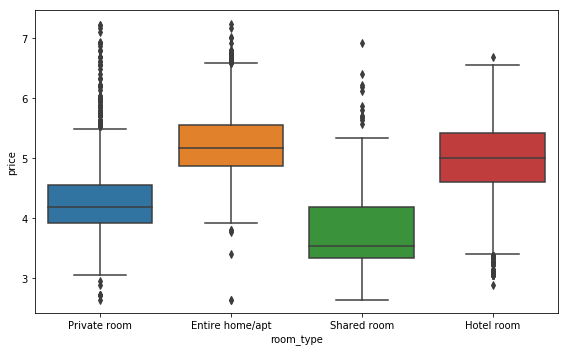

In [174]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['room_type'],y=np.log(df['price']))
plt.tight_layout()

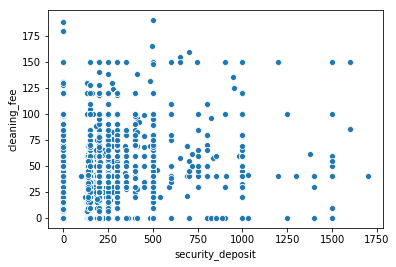

In [175]:
sns.scatterplot(x=df['security_deposit'],y=df['cleaning_fee'])

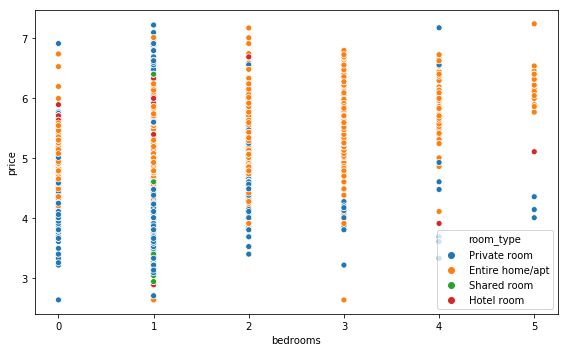

In [176]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['bedrooms'],y=np.log(df['price']),hue=df['room_type'])
plt.tight_layout()

<h3> Converting Object to categorical data type

In [177]:
df.dtypes

host_is_superhost          object
host_identity_verified     object
neighbourhood_group        object
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
bed_type                   object
amenities                  object
price                       int64
security_deposit          float64
cleaning_fee              float64
guests_included             int64
extra_people                int64
number_of_reviews           int64
instant_bookable           object
cancellation_policy        object
dtype: object

In [178]:
df.reset_index(drop=True,inplace=True)

In [179]:
df_amenities=df[['amenities','price']]
df.drop('amenities',axis=1,inplace=True)

In [180]:
#del(binary_cols)
cat_cols=[]
binary_cols=[]
for i in df.columns:
    if df[i].dtype in ['object']:
        df[i]=df[i].astype('category')
        #print(i)
        if df[i].nunique()<3:
            
            binary_cols.append(i)
        else:
            cat_cols.append(i)
    else:
        pass

In [181]:
binary_cols
d={'f':1,'t':0}
df[binary_cols]=df[binary_cols].replace(d)

cat_cols
df_dummies=pd.get_dummies(df[cat_cols],drop_first=True)

In [182]:
df_dummies.shape

(7344, 21)

In [183]:
df_final=pd.concat([df,df_dummies],axis=1)
df_final.shape

(7344, 39)

In [184]:
cat_cols

['neighbourhood_group',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [185]:
df_final.drop(cat_cols,axis=1,inplace=True)
df_final.shape

(7344, 34)

<h4> Feature Engineering for Amenities Column

In [186]:
df_amenities

,amenities,price
0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",83
1,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",80
2,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",69
3,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",204
4,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",94
...,...,...
7339,"{TV,Wifi,""Air conditioning"",Kitchen,""Smoking a...",105
7340,"{Wifi,""Air conditioning"",Kitchen,Washer,Shampo...",110
7341,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",529
7342,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",69


In [187]:
df_amenities['amenities']=df_amenities['amenities'].apply(lambda x: x.replace('{','[').replace('}',']').replace('''"''','')[1:-1].split(','))

In [188]:
df_amenities['amenities']

0       [TV, Cable TV, Internet, Wifi, Air conditionin...
1       [TV, Cable TV, Internet, Wifi, Air conditionin...
2       [TV, Cable TV, Wifi, Air conditioning, Kitchen...
3       [TV, Wifi, Air conditioning, Kitchen, Pets liv...
4       [TV, Internet, Wifi, Air conditioning, Kitchen...
                              ...                        
7339    [TV, Wifi, Air conditioning, Kitchen, Smoking ...
7340    [Wifi, Air conditioning, Kitchen, Washer, Sham...
7341    [TV, Wifi, Air conditioning, Pool, Kitchen, Gy...
7342    [TV, Wifi, Air conditioning, Pool, Kitchen, Fr...
7343    [TV, Wifi, Air conditioning, Kitchen, Free par...
Name: amenities, Length: 7344, dtype: object

In [189]:
col_keys = []
for i in df_amenities['amenities']:
    for j in i:
        if j not in col_keys:
            col_keys.append(j)
            
refined_feature_dict = {}
amenities_size = len(df_amenities['amenities'])
for i in col_keys:
    refined_feature_dict[i]=[0]*amenities_size

for i in range(len(df_amenities['amenities'])):
    for j in df_amenities['amenities'][i]:
        refined_feature_dict[j][i]=1

df_list=pd.DataFrame(refined_feature_dict)

In [190]:
required_amenities=list(df_list.sum().sort_values(ascending=False)[:44].keys())
df_req_amenities=df_list[required_amenities]
for i in df_req_amenities.columns:
    df_req_amenities[i]=df_req_amenities[i].astype('category')

In [191]:
df_req_amenities.isnull().sum()

Wifi                          0
Air conditioning              0
Washer                        0
Essentials                    0
Kitchen                       0
Hangers                       0
Iron                          0
TV                            0
Hair dryer                    0
Shampoo                       0
Elevator                      0
Laptop friendly workspace     0
Dryer                         0
Lock on bedroom door          0
Hot water                     0
Pool                          0
Gym                           0
Long term stays allowed       0
Smoke detector                0
Refrigerator                  0
Fire extinguisher             0
Heating                       0
Microwave                     0
Free parking on premises      0
Family/kid friendly           0
Bed linens                    0
Stove                         0
Dishes and silverware         0
Private entrance              0
First aid kit                 0
Internet                      0
Cooking 

In [192]:
df_final.shape

(7344, 34)

In [193]:
#df_final1.isnull().sum().sort_values(ascending=False)

In [194]:
df_final1=pd.concat([df_final,df_req_amenities],axis=1)
cat_cols = list(df_final1.select_dtypes(['category','uint8']).columns)
num_cols = list(df_final1.select_dtypes(['int64','float64']).columns)
num_cols.remove('price')

<h2> Splitting Data into Test and Train, Standadizing

In [195]:
y=df_final1['price']
X=df_final1.drop(['price'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

std=StandardScaler()
X_train_std=std.fit_transform(X_train[num_cols])
#X_train_std = std.transform(X_train[num_cols])
X_test_std=std.transform(X_test[num_cols])


X_train_std=pd.DataFrame(X_train_std,columns=num_cols,index=X_train.index)
X_test_std=pd.DataFrame(X_test_std,columns=num_cols,index=X_test.index)


In [196]:
a=X_train[cat_cols]
b=X_test[cat_cols]

X_stand_train=pd.concat([X_train_std,a],axis=1)
X_stand_test=pd.concat([X_test_std,b],axis=1)

print('Train shapes: ',X_stand_train.shape, y_train.shape)
print('Test shapes: ',X_stand_test.shape, y_test.shape)

Train shapes:  (5140, 77) (5140,)
Test shapes:  (2204, 77) (2204,)


<h4> checking skewness and Kurtosis Price

In [73]:
print( 'kurtosis of normal distribution : {}'.format( kurtosis(df['price']) ))
print( 'skewness of normal distribution : {}'.format( skew(df['price']) ))

kurtosis of normal distribution : 14.750688281697222
skewness of normal distribution : 2.7954388628201876


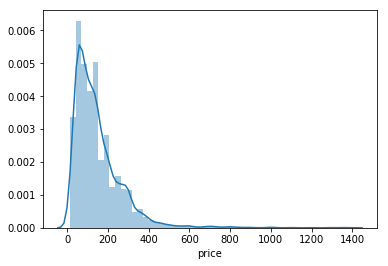

In [74]:
sns.distplot(df['price'])

In [75]:
print( 'kurtosis of normal distribution : {}'.format( kurtosis(np.log(df['price'])) ))
print( 'skewness of normal distribution : {}'.format( skew(np.log(df['price'])) ))

kurtosis of normal distribution : -0.34778133887846785
skewness of normal distribution : -0.021303289283453073


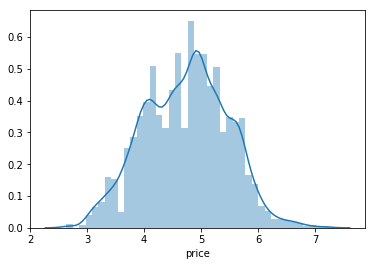

In [76]:
sns.distplot(np.log(df['price']))

<h1> Model Building

<h4> Linear Regression

In [82]:
y_log=np.log(y_train)

In [80]:
lm_model=LinearRegression()
lm_model.fit(X_stand_train,y_train)
y_pred_lm=lm_model.predict(X_stand_test)

In [81]:
print('RMSE of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_pred_lm)))

RMSE of Linear Regression:  85.31508921647207


In [83]:
lm_model=LinearRegression()
lm_model.fit(X_stand_train,y_log)
y_pred_lm=lm_model.predict(X_stand_test)

In [84]:
print('RMSE of Linear Regression with Log Transform: ',np.sqrt(mean_squared_error(y_test,np.exp(y_pred_lm))))

RMSE of Linear Regression with Log Transform:  88.02716885837349


([3651.2003898657263,
  5473.668501559452,
  6163.318702620992,
  5813.754794308565,
  5918.686159701574,
  5986.667813306435,
  6816.7592631670295,
  6899.925597202739,
  6767.743532165802,
  6785.639107235313],
 [7586.6253269295585,
  7791.614352755093,
  7561.217989931796,
  7503.5849360583625,
  7448.730785398041,
  7437.897127693928,
  7389.811319380351,
  7348.5129282848675,
  7291.864811525521,
  7278.664448014618])

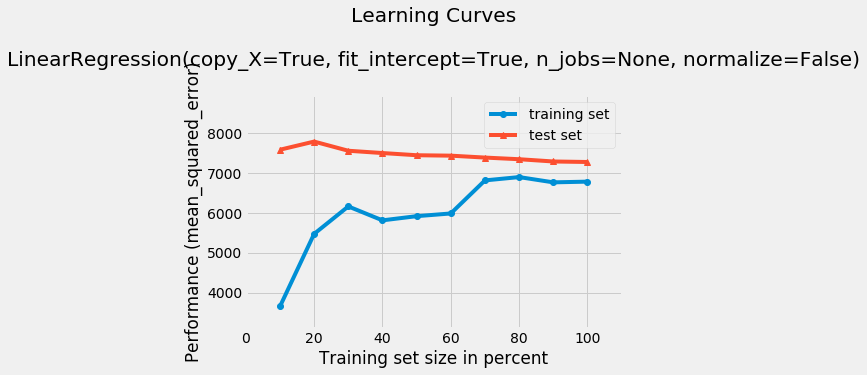

In [85]:
lm=LinearRegression()
plot_learning_curves(X_train,y_train,X_test,y_test,lm,scoring='mean_squared_error')

<h3> Lasso Model

In [86]:
lasso_model=Lasso()
lasso_model.fit(X_stand_train,y_train)
y_pred_lasso=lasso_model.predict(X_stand_test)

In [87]:
print('RMSE of Lasso Model: ',np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

RMSE of Lasso Model:  87.7389861607942


In [128]:
lasso_model=Lasso()
lasso_model.fit(X_stand_train,y_log)
y_pred_lasso=lasso_model.predict(X_stand_test)
print('RMSE of Lasso Model with Log Transform: ',np.sqrt(mean_squared_error(y_test,np.exp(y_pred_lasso))))

RMSE of Lasso Model with Log Transform:  125.17535219025662


([4939.72271622559,
  6593.622817552616,
  7198.006911046291,
  6803.897560300168,
  6886.719774446906,
  6929.100598077845,
  7731.561311121058,
  7821.875506702053,
  7634.017775381579,
  7626.899753842301],
 [8084.557540686683,
  8074.127062761973,
  8158.644290421233,
  8093.919927551811,
  8093.116957908833,
  8105.569966333969,
  8090.199215748461,
  8086.467440088663,
  8088.1752867372315,
  8097.787051448697])

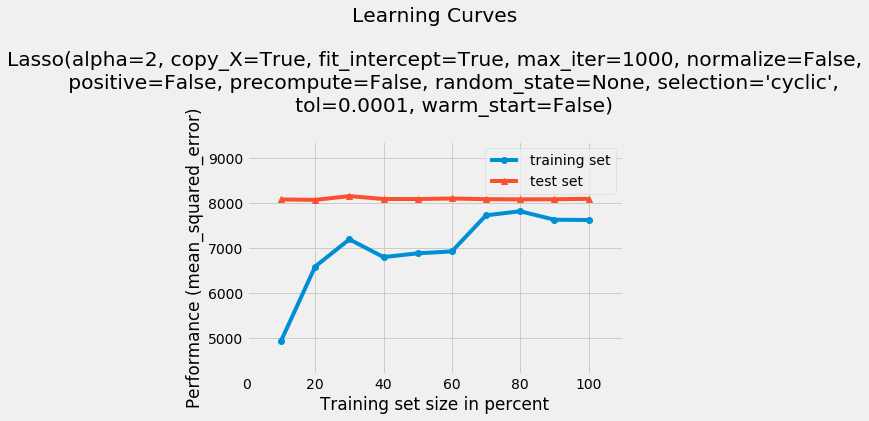

In [127]:
lasso=Lasso(alpha=2)
plot_learning_curves(X_train,y_train,X_test,y_test,lasso,scoring='mean_squared_error')

<h3>KNN Model

In [88]:
knn=KNeighborsRegressor(n_neighbors=11,n_jobs=-1)
knn.fit(X_stand_train,y_train)
y_pred_knn=knn.predict(X_stand_test)
print('RMSE of KNN: ',np.sqrt(mean_squared_error(y_test,y_pred_knn)))

RMSE of KNN:  82.6929509204468


<h3> Random Forest Model

In [89]:
rf=RandomForestRegressor(n_estimators=100,n_jobs=-1)

In [90]:
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print('RMSE of Random Forest Model: ',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of Random Forest Model:  79.42887038927502


([834.0646955252918,
  829.0195878968872,
  992.5373209522371,
  833.5699743169502,
  829.0401477941057,
  822.557656136928,
  988.0374157214267,
  949.7439140011127,
  896.6727437029679,
  898.3332341336567],
 [7336.9279284482745,
  7373.24630244147,
  7198.893889142908,
  7080.483353683831,
  6637.362769732903,
  6867.814559871503,
  6759.890943599059,
  6589.028471474924,
  6388.691583557281,
  6184.784241452742])

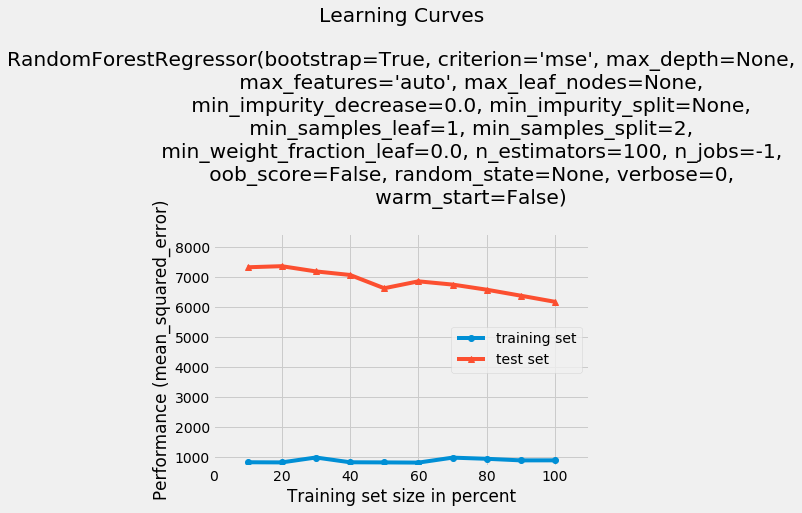

In [91]:
plot_learning_curves(X_train,y_train,X_test,y_test,rf,scoring='mean_squared_error')

In [129]:
parameters={
    'max_depth':np.arange(3,21,2),
    'min_samples_split':np.arange(3,12,2),
    'min_samples_leaf':[2,4,7],
    'random_state':[123]
}
grid=GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=-1,cv=10)

In [130]:
grid.fit(X_train,y_train)
y_pred_grid=grid.predict(X_test)

In [131]:
print('RMSE of Grid Search Model: ',np.sqrt(mean_squared_error(y_test,y_pred_grid)))

RMSE of Grid Search Model:  78.66155600200835


<h3> Feature Scaling columns based on feature._importances_ Through Random Forest

In [132]:
grid.best_estimator_.feature_importances_

array([0.00421773, 0.0051724 , 0.0818023 , 0.02450006, 0.44433928,
       0.03088851, 0.01321389, 0.03515591, 0.01268203, 0.03956174,
       0.02385746, 0.00562582, 0.00069115, 0.00055103, 0.00138588,
       0.001472  , 0.00559448, 0.01792152, 0.00424159, 0.00970375,
       0.00258698, 0.00215298, 0.05194301, 0.00983218, 0.        ,
       0.        , 0.        , 0.00135075, 0.00120551, 0.        ,
       0.00719563, 0.00250318, 0.        , 0.00278124, 0.00157829,
       0.00745411, 0.00500921, 0.00218563, 0.00467612, 0.00313493,
       0.00781897, 0.0030341 , 0.00544899, 0.00444887, 0.00428381,
       0.00476609, 0.00588941, 0.00304752, 0.0048572 , 0.00728573,
       0.00300218, 0.00562523, 0.00084688, 0.00473336, 0.00397276,
       0.00085284, 0.00578606, 0.00503963, 0.00159882, 0.00107251,
       0.00167378, 0.00170786, 0.00492837, 0.00562059, 0.00196528,
       0.00199042, 0.00093588, 0.00160745, 0.00617128, 0.00060858,
       0.00089696, 0.00183216, 0.00379733, 0.00581764, 0.00268

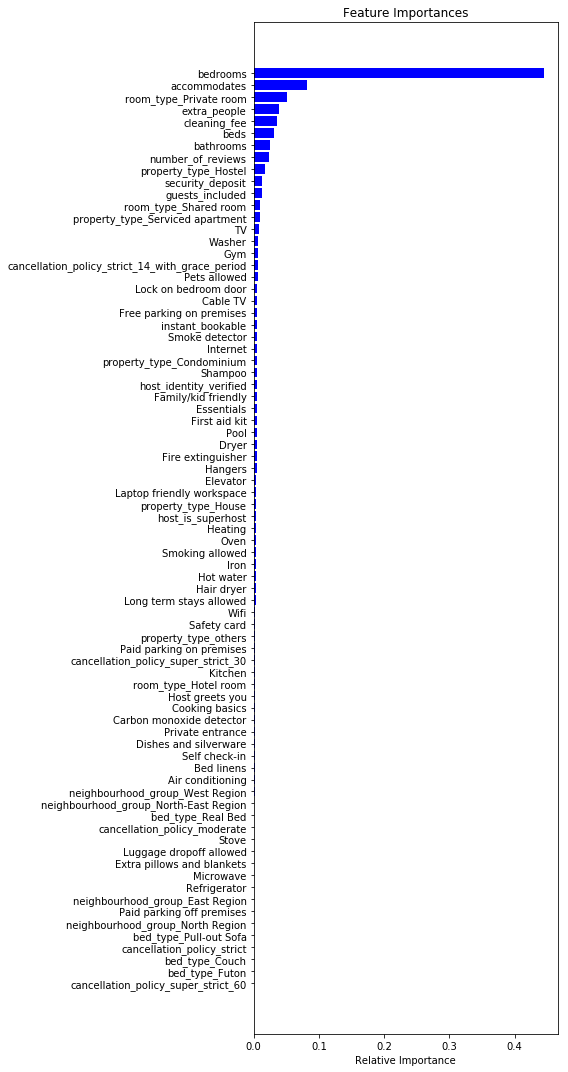

In [133]:
features = list(X_train.columns)
importances = grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

([30620.82614470364,
  11528.534467338222,
  22239.71547074476,
  100132.4383346474,
  105145.05686609047,
  91420.67649646894,
  87931.62160030362,
  80069.93026341876,
  72063.07919141902,
  81143.86601909045],
 [37073.80241526184,
  25551.840230119575,
  31423.6274234726,
  29860.920479693334,
  23891.685323583755,
  23011.765150694373,
  22975.73718470083,
  23230.733648824036,
  23419.413920857096,
  27132.60384457421])

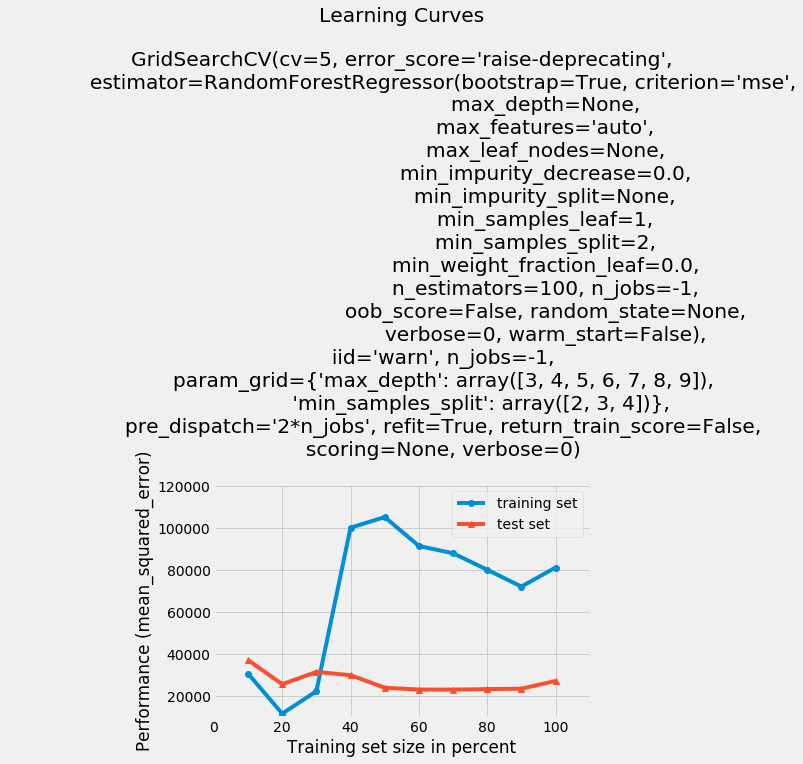

In [236]:
#grid=grid=GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=-1,cv=10)
plot_learning_curves(X_train,y_train,X_test,y_test,grid,scoring='mean_squared_error')

<h3> ADABOOST Model

In [95]:
ada=AdaBoostRegressor(n_estimators=100)
ada.fit(X_train,y_train)
y_pred_ada=ada.predict(X_test)
print('RMSE of ADABOOST Model: ',np.sqrt(mean_squared_error(y_test,y_pred_ada)))

RMSE of ADABOOST Model:  119.1744728377916


In [97]:
para = {'n_estimators':[100],'random_state':[1234],}
ada_grid = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=15,max_features='sqrt',
                                                                min_samples_leaf=4,min_samples_split=8),learning_rate=0.4),
                        param_grid=para, cv = 10, n_jobs=-1 )
ada_grid.fit(X_train,y_train)
y_pred_ada=ada_grid.predict(X_test)

In [98]:
print('RMSE of ADABOOST Model with Grid Search: ',np.sqrt(mean_squared_error(y_test,y_pred_ada)))

RMSE of ADABOOST Model:  76.28106248057979


In [112]:
ada_grid.best_estimator_.feature_importances_

array([6.47473614e-03, 1.82081242e-02, 6.13561295e-02, 5.87199109e-02,
       5.66917886e-02, 3.74918866e-02, 1.84960478e-02, 4.21675849e-02,
       1.91678282e-02, 1.95350632e-02, 3.44513338e-02, 2.06888463e-02,
       5.26623945e-03, 2.77733364e-03, 1.16836187e-02, 2.29751771e-02,
       1.56816704e-02, 2.35967007e-03, 2.76200928e-02, 6.69541254e-03,
       8.16789537e-03, 1.61063609e-03, 2.02417085e-02, 4.71342480e-03,
       4.90973198e-03, 6.40161337e-07, 2.11688826e-04, 5.48035627e-03,
       3.35218481e-03, 0.00000000e+00, 1.19344210e-02, 9.26973665e-04,
       2.97593770e-07, 6.39012493e-03, 8.64669110e-03, 1.34380763e-02,
       1.91970300e-02, 1.22464873e-02, 1.63145966e-02, 1.19389342e-02,
       1.92891433e-02, 1.24694278e-02, 1.53165841e-02, 1.52630504e-02,
       1.47147738e-02, 1.28632338e-02, 1.65221213e-02, 8.92869483e-03,
       1.32984922e-02, 1.14138488e-02, 4.29200201e-03, 1.06911025e-02,
       4.49430844e-03, 1.12406595e-02, 1.25992777e-02, 4.45308323e-03,
      

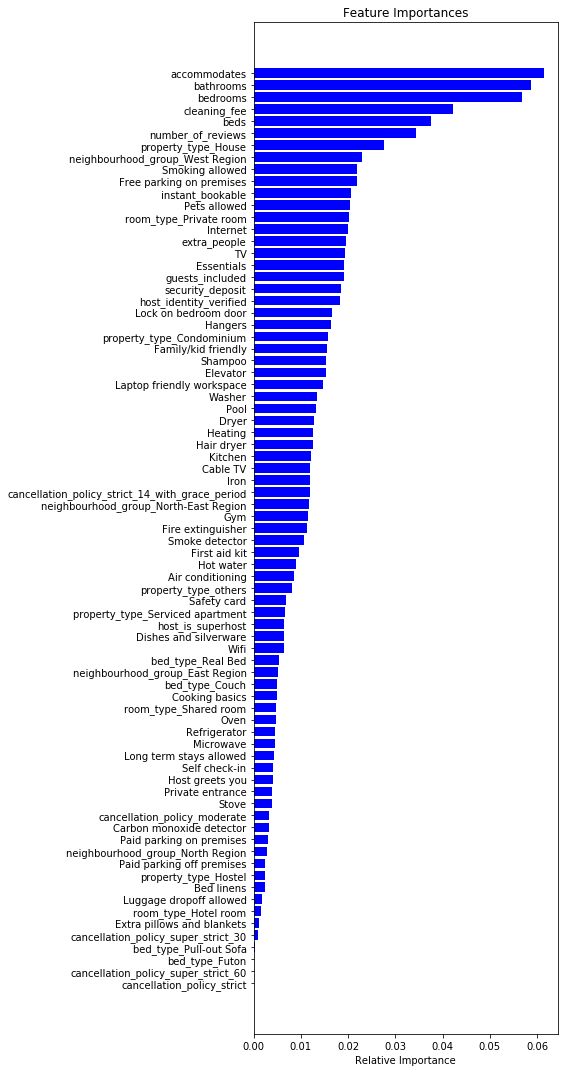

In [113]:
features = list(X_train.columns)
importances = ada_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [197]:
drop_list=['cancellation_policy_strict','bed_type_Pull-out Sofa','bed_type_Futon'
           ,'cancellation_policy_super_strict_60']

In [198]:
X_train1=X_train.drop(drop_list,axis=1)
X_test1=X_test.drop(drop_list,axis=1)

In [123]:
para = {'n_estimators':[200],'random_state':[1234]}
ada_grid = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(max_depth=15,max_features='sqrt',
                                                                min_samples_leaf=4,min_samples_split=8),learning_rate=0.4),
                        param_grid=para, cv = 10, n_jobs=-1 )
ada_grid.fit(X_train1,y_train)
y_pred_ada=ada_grid.predict(X_test1)
print('RMSE of ADABOOST Model with Grid Search: ',np.sqrt(mean_squared_error(y_test,y_pred_ada)))

RMSE of ADABOOST Model with Grid Search:  75.84025079506712


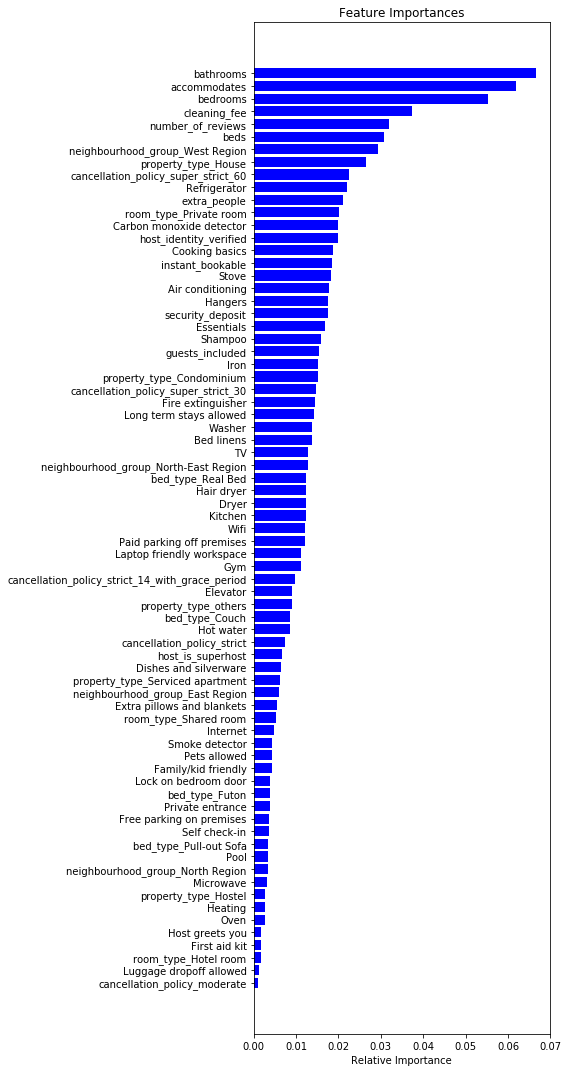

In [124]:

features = list(X_train.columns)
importances = ada_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

([646.4215192313106,
  648.6734428107324,
  651.542665124947,
  608.8891462881813,
  611.3101023585797,
  611.7020352507036,
  617.0390889249911,
  622.1145563030918,
  612.4327155869241,
  612.0224477679553],
 [6934.306137300944,
  6703.95443196369,
  6653.773073505175,
  6525.262461271573,
  6340.986900649406,
  6245.410649429529,
  6184.312449959445,
  6115.8478573355505,
  5876.186821310569,
  5818.800493166119])

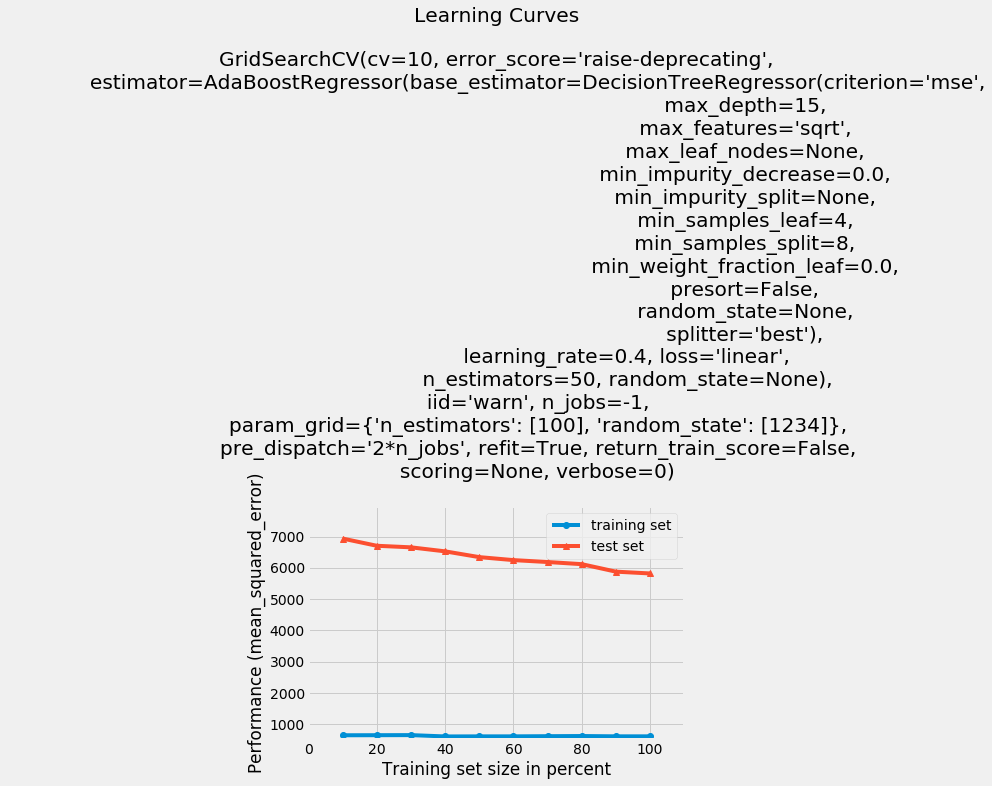

In [119]:
plot_learning_curves(X_train,y_train,X_test,y_test,ada_grid,scoring='mean_squared_error')

<h3>Gradient Boost

In [125]:
gb=GradientBoostingRegressor(learning_rate=0.001,alpha=.9)
gb.fit(X_train1,y_train)
y_pred_gb=gb.predict(X_test1)

In [126]:
print('RMSE of Gradient Boost: ',np.sqrt(mean_squared_error(y_pred_gb,y_test)))

RMSE of Gradient Boost:  115.04492362017669


In [ ]:
gb=GradientBoostingRegressor()

params = {'n_estimators': np.arange(100,200,10),
          'max_depth': np.arange(3,25,2), 
          'min_samples_split': [2,4],
          'learning_rate': [0.01,0.001,0.9],
          'loss': ['ls'],
          
          'max_features':['sqrt'],
          'max_leaf_nodes':[7,10,13],
         'alpha':[0.1,0.5,0.9]}
grid_gb=GridSearchCV(estimator=gb,param_grid=params,n_jobs=-1,cv=10)
grid_gb.fit(X_train1,y_train)
y_pred_gb=grid_gb.predict(X_test1)
print('RMSE of Gradient Boost: ',np.sqrt(mean_squared_error(y_pred_gb,y_test)))

In [ ]:
df.info(memory_usage='deep')